Net(
  (fc1): Linear(in_features=1, out_features=4096, bias=False)
  (fc2): Linear(in_features=4096, out_features=2048, bias=False)
  (fc3): Linear(in_features=2048, out_features=1, bias=False)
)
[Parameter containing:
tensor([[ 0.2647],
        [ 0.6125],
        [-0.9204],
        ...,
        [ 0.0500],
        [-0.9578],
        [ 0.2392]], requires_grad=True), Parameter containing:
tensor([[-0.0024, -0.0130, -0.0089,  ...,  0.0104, -0.0093,  0.0004],
        [-0.0113,  0.0020, -0.0090,  ..., -0.0022,  0.0090,  0.0082],
        [ 0.0095, -0.0065,  0.0018,  ..., -0.0002, -0.0011, -0.0053],
        ...,
        [ 0.0075, -0.0020, -0.0113,  ...,  0.0152, -0.0037, -0.0074],
        [ 0.0107,  0.0123,  0.0095,  ...,  0.0040, -0.0150,  0.0105],
        [ 0.0084,  0.0105,  0.0039,  ...,  0.0059, -0.0142, -0.0010]],
       requires_grad=True), Parameter containing:
tensor([[ 0.0178,  0.0086,  0.0049,  ..., -0.0132, -0.0218, -0.0171]],
       requires_grad=True)]


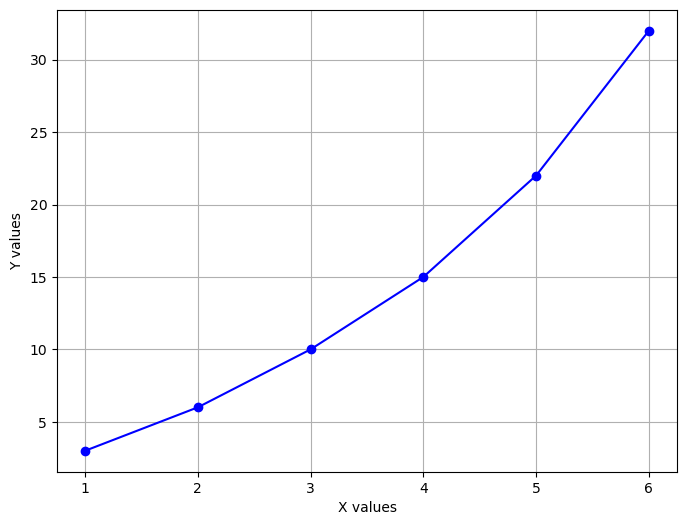

In [96]:
### Training with fancier version ###

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module): ## nn.Module class is used
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,4096,bias=False)  # in dim, out dim
        self.fc2 = nn.Linear(4096,2048,bias=False)
        self.fc3 = nn.Linear(2048,1,bias=False)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        return x

net = Net()

print(net)
print(list(net.parameters())) # parameters are randomized


#def criterion(out, label):
#    return (label - out)**2
criterion = nn.MSELoss()


# optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.00007,)


data = [(1.0,3.0), (2.0,6.0), (3.0,10.0), (4.0,15.0), (5.0,22.0), (6.0,32.0)]

# Split data into x and y
x_values, y_values = zip(*data)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.grid(True)
plt.show()

In [97]:
for epoch in range(1500): # 0 - 19
    for i, current_data in enumerate(data):
        X, Y = current_data
        X, Y = torch.FloatTensor([X]), torch.FloatTensor([Y])
        optimizer.zero_grad()   
        outputs = net(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()    ## This line is equivalent to "W = W - lr* W.grad"
    print("Epoch {} - loss: {}".format(epoch, loss))
    
### Test the trained network ###            
for i, current_data in enumerate(data):
    X, Y = current_data
    X, Y = torch.FloatTensor([X]), torch.FloatTensor([Y])  
    out = net(torch.FloatTensor(X))  
    print("when x = {}, y = {}".format(X, out))
    

Epoch 0 - loss: 813.1439208984375
Epoch 1 - loss: 640.717529296875
Epoch 2 - loss: 541.05712890625
Epoch 3 - loss: 484.72906494140625
Epoch 4 - loss: 451.06329345703125
Epoch 5 - loss: 429.23956298828125
Epoch 6 - loss: 413.9154357910156
Epoch 7 - loss: 402.3877258300781
Epoch 8 - loss: 393.2191467285156
Epoch 9 - loss: 385.6056823730469
Epoch 10 - loss: 379.0762634277344
Epoch 11 - loss: 373.3439025878906
Epoch 12 - loss: 368.2283630371094
Epoch 13 - loss: 363.61456298828125
Epoch 14 - loss: 359.42724609375
Epoch 15 - loss: 355.6150817871094
Epoch 16 - loss: 352.1430969238281
Epoch 17 - loss: 348.986083984375
Epoch 18 - loss: 346.1280517578125
Epoch 19 - loss: 343.560791015625
Epoch 20 - loss: 341.2837829589844
Epoch 21 - loss: 339.2940979003906
Epoch 22 - loss: 337.56591796875
Epoch 23 - loss: 336.0288391113281
Epoch 24 - loss: 334.5439453125
Epoch 25 - loss: 332.8877258300781
Epoch 26 - loss: 330.76983642578125
Epoch 27 - loss: 327.90374755859375
Epoch 28 - loss: 324.1062927246094
E

In [ ]:
for epoch in range(20):
    print(epoch)

In [ ]:
W = torch.tensor([1.0], requires_grad=True)
W = W*2
label = 1.0
loss = W*5 - label 
loss.backward()
W.grad